In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# two starting numbers and only one output number

# dimensions of input and output layers
N0 = 2
N1 = 30
N2 = 1

In [3]:
# activation function

def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

def theta(x):
    
    if x < 0:
        return 1
    else:
        return 0

In [4]:
# output function

# dictionary containing activation functions
activation_dict = {"theta": theta, "sigmoid": sigmoid}

def layer(act, v, w, b):
    
    z = np.dot(v, w) + b
    return activation_dict[act](z)

In [5]:
# making a network with n hidden layers

layer_count = 20

weights_in = np.random.uniform(low = -10, high = +10, size = (N2, N0))
bias_in = np.random.uniform(low = -1, high = +1, size = N2)

weights_hidden = np.random.uniform(low = -10, high = +10, size = (layer_count, N0, N0))
bias_hidden = np.random.uniform(low = -1, high = +1, size = (layer_count, N0))

weights_out = np.random.uniform(low = -10, high = +10, size = (N2, N0))
bias_out = np.random.uniform(low = -1, high = +1, size = N2)

def network(y_in, activation, n):
    
    y_vals = y_in
    
    for i in range(n):
        y_vals = layer(activation, y_vals, weights_hidden[i], bias_hidden[i])
                                
    return layer(activation, y_vals, weights_out, bias_out)

In [6]:
# making a network with n hidden layers

# minimum number of layers to be used: 1
layer_count = 20

weights_in = np.random.uniform(low = -10, high = +10, size = (N0, N1))
bias_in = np.random.uniform(low = -1, high = +1, size = N1)

weights_hidden = np.random.uniform(low = -10, high = +10, size = (layer_count, N1, N1))
bias_hidden = np.random.uniform(low = -1, high = +1, size = (layer_count, N1))

weights_out = np.random.uniform(low = -10, high = +10, size = (N1, N2))
bias_out = np.random.uniform(low = -1, high = +1, size = N2)

def network_multi(y_in, activation, n):
    
    y_vals = y_in
    
    y_vals = layer(activation, y_vals, weights_in, bias_in)
    
    for i in range(n):
        y_vals = layer(activation, y_vals, weights_hidden[i], bias_hidden[i])
                                
    return layer(activation, y_vals, weights_out, bias_out)

In [7]:
# visualize

# visualize 100 points

M = 1000

plotmatrix = np.zeros([M, M])

y1, y2 = np.meshgrid(np.linspace(-0.5, 0.5, M), np.linspace(-0.5, 0.5, M))

y1_flat = y1.flatten()
y2_flat = y2.flatten()

y_in = np.empty((len(y1_flat), 2))
y_in[:,0] = y1_flat
y_in[:,1] = y2_flat

print(np.shape(y_in))

plotmatrix = network_multi(y_in, "sigmoid", layer_count)

plotmatrix = np.reshape(plotmatrix[:, 0], (M, M))
        


(1000000, 2)


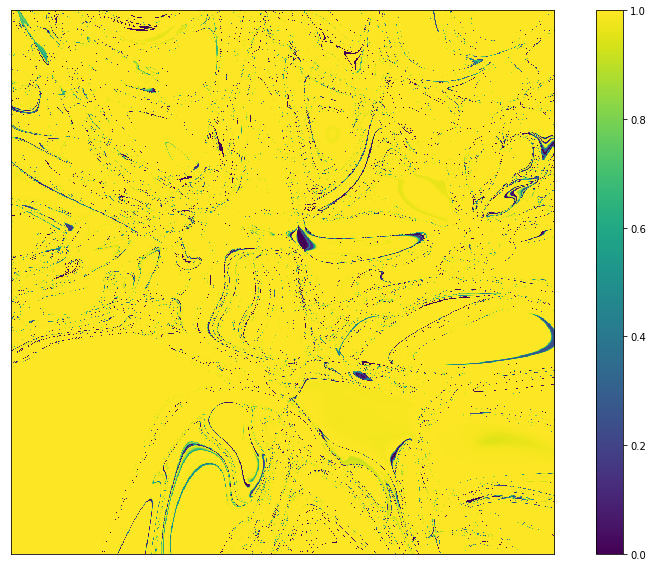

In [8]:
# plot

plt.figure(figsize = (15, 10), facecolor = "white")

plt.imshow(plotmatrix, origin = "lower")
plt.colorbar()

#, extent=(-0.5,0.5,-0.5,0.5)

plt.xticks([], [])
plt.yticks([], [])

# plt.hlines(50, 0, 99)
# plt.vlines(50, 0, 99)

# plt.xlim(0, 99)
# plt.ylim(0, 99)

plt.show()